In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import timedelta

In [2]:
todaydate = datetime.today().strftime('%Y-%m-%d') #This will be needed for analysing the date type attributes
todaydate

'2021-03-01'

In [3]:
# Read data - members.csv
member_df = pd.read_csv('data/members_v3.csv')
member_df.head()

,msno,city,bd,gender,registered_via,registration_init_time
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,0,NaN,11,20110911
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,0,NaN,7,20110914
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,0,NaN,11,20110915
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,0,NaN,11,20110915
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,32,female,9,20110915


In [4]:
#Check for duplicates msno in members_v3.csv
member_df.duplicated(subset='msno').sum()

0

In [5]:
#Calculate percentage of missing values for each column attribute
member_df.isna().sum() / len(member_df) * 100

msno                       0.000000
city                       0.000000
bd                         0.000000
gender                    65.433528
registered_via             0.000000
registration_init_time     0.000000
dtype: float64

In [6]:
# Analyse gender column
member_df.gender.describe()

count     2339968
unique          2
top          male
freq      1195355
Name: gender, dtype: object

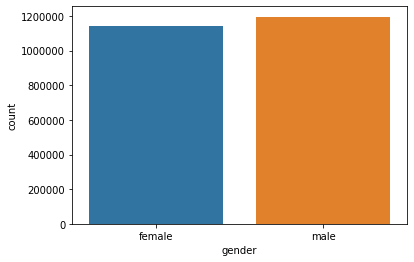

In [7]:
sns.countplot(x='gender', data=member_df)

In [8]:
# dropping gender as it has 65% of missing data
member_df = member_df.drop(columns='gender')

In [9]:
member_df.describe()

,city,bd,registered_via,registration_init_time
count,6.769473e+06,6.769473e+06,6.769473e+06,6.769473e+06
mean,3.847358e+00,9.795794e+00,5.253069e+00,2.014518e+07
std,5.478359e+00,1.792590e+01,2.361398e+00,2.318601e+04
min,1.000000e+00,-7.168000e+03,-1.000000e+00,2.004033e+07
25%,1.000000e+00,0.000000e+00,4.000000e+00,2.014042e+07
50%,1.000000e+00,0.000000e+00,4.000000e+00,2.015101e+07
75%,4.000000e+00,2.100000e+01,7.000000e+00,2.016060e+07
max,2.200000e+01,2.016000e+03,1.900000e+01,2.017043e+07


In [10]:
member_df.msno.value_counts() # ceck if duplicate users present or not

VaIUcgWW15x2SQeNjfnKOWE4nCEhIB4eevV9ZvlmBK0=    1
IJgKCMCq9Fj0MkHbiW1o5gPrA9qZE4DADZaZdGoxL7w=    1
/ksFzZmKy/rtp3kv74eN5moziuZS0Q2MeeNbA1TcDAo=    1
KHv9KtHhAKkA4jdFFBAXA9fWgdfWxCrKhXogW093IWo=    1
H+sfzUMYv+SRUtDX4hZ8+DATHzberqCNTN6ElawDilA=    1
                                               ..
M/s67ETnEgF8Cdi6DDcpkOLBimUO8GhICZ9OZ4OHoNM=    1
liYGlP3mjBVUAgVExLVU0VSwxfowMoy8Fzl/CeI5xt8=    1
mI8JuwAlL/j4Vd9/ixJt9qGmPfrQJrnLx7RnQWviEcM=    1
KxD4CxVQWsMwt0JMaRMxGvCTWlrz3dHixLXti5I6Hlc=    1
9xQmtdy1OGVEK0Pp8Q9lWas5uE3ZpTNwMCpLeph2Ulk=    1
Name: msno, Length: 6769473, dtype: int64

In [11]:
# Analyse bd column
member_df.bd.value_counts()

 0      4540215
 22      112200
 21      110574
 20      110452
 27      102769
         ...   
 919          1
 920          1
 923          1
 925          1
-5            1
Name: bd, Length: 386, dtype: int64

In [12]:
member_df.bd.value_counts()/ len(member_df) * 100

 0      67.068958
 22      1.657441
 21      1.633421
 20      1.631619
 27      1.518124
          ...    
 919     0.000015
 920     0.000015
 923     0.000015
 925     0.000015
-5       0.000015
Name: bd, Length: 386, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8db5459290>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8db546ca50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8db5465310>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8db54744d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8db54749d0>],
 'means': []}

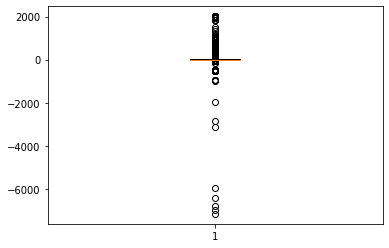

In [13]:
plt.ion()
plt.boxplot(member_df['bd'])

In [14]:
# attribute "bd" is having more than 65% values as incorrect, hence dropping this column
member_df = member_df.drop(columns='bd')

In [15]:
member_df.describe()

,city,registered_via,registration_init_time
count,6.769473e+06,6.769473e+06,6.769473e+06
mean,3.847358e+00,5.253069e+00,2.014518e+07
std,5.478359e+00,2.361398e+00,2.318601e+04
min,1.000000e+00,-1.000000e+00,2.004033e+07
25%,1.000000e+00,4.000000e+00,2.014042e+07
50%,1.000000e+00,4.000000e+00,2.015101e+07
75%,4.000000e+00,7.000000e+00,2.016060e+07
max,2.200000e+01,1.900000e+01,2.017043e+07


In [16]:
member_df.city.value_counts()

1     4804326
5      385069
13     320978
4      246848
22     210407
15     190213
6      135200
14      89940
12      66843
9       47639
11      47489
8       45975
18      38039
10      32482
21      30837
17      27772
3       27282
7       11610
16       5092
20       4233
19       1199
Name: city, dtype: int64

In [17]:
member_df.city.value_counts()/ len(member_df) * 100

1     70.970458
5      5.688316
13     4.741551
4      3.646488
22     3.108174
15     2.809864
6      1.997201
14     1.328612
12     0.987418
9      0.703733
11     0.701517
8      0.679152
18     0.561920
10     0.479831
21     0.455530
17     0.410254
3      0.403015
7      0.171505
16     0.075220
20     0.062531
19     0.017712
Name: city, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8d8ef10910>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8d8ef05d10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8d8ef05cd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8d8ef16e50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8d8ef10f50>],
 'means': []}

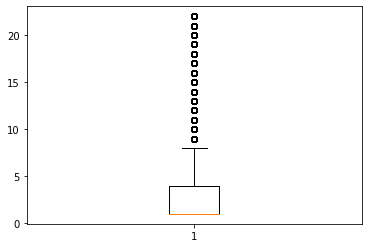

In [18]:
plt.ion()
plt.boxplot(member_df['city'])

In [19]:
# Analyse registration_init_time
#Convert String to Date
member_df['registration_init_time']=pd.to_datetime(member_df['registration_init_time'], format='%Y%m%d')
member_df.head()

,msno,city,registered_via,registration_init_time
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,11,2011-09-11
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,7,2011-09-14
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,11,2011-09-15
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,11,2011-09-15
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,9,2011-09-15


In [20]:
member_df[member_df['registration_init_time'] > todaydate]

,msno,city,registered_via,registration_init_time


In [21]:
# Implies no incorrect values in registration_init_time

In [22]:
member_df.count()

msno                      6769473
city                      6769473
registered_via            6769473
registration_init_time    6769473
dtype: int64

In [23]:
member_df.head()

,msno,city,registered_via,registration_init_time
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,11,2011-09-11
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,7,2011-09-14
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,11,2011-09-15
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,11,2011-09-15
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,9,2011-09-15


In [24]:
member_df

,msno,city,registered_via,registration_init_time
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,11,2011-09-11
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,7,2011-09-14
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,11,2011-09-15
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,11,2011-09-15
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,9,2011-09-15
...,...,...,...,...
6769468,VSGkb3hyBRUtb/b1MQUZbvOkktS3vKLnhMHW0CF8eyU=,1,7,2015-10-20
6769469,nWjH7glPkZ7jOVaCRwwjlpmp0T1hSWdv8hMJxiWCwKc=,1,7,2015-10-20
6769470,GH+b5+1tlv7ZZXsA8upBzVXMTLyffKcsF7WoU8b5rOI=,15,4,2015-10-20
6769471,XVlwT3fdCFGKqerEKBzUIjK+jzI6jzSke4cDMVhYyjE=,1,4,2015-10-20


In [25]:
# Read data - user_logs.csv
user_logs_df = pd.read_csv('data/user_logs_v2.csv')
user_logs_df.head()

,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,u9E91QDTvHLq6NXjEaWv8u4QIqhrHk72kE+w31Gnhdg=,20170331,8,4,0,1,21,18,6309.273
1,nTeWW/eOZA/UHKdD5L7DEqKKFTjaAj3ALLPoAWsU8n0=,20170330,2,2,1,0,9,11,2390.699
2,2UqkWXwZbIjs03dHLU9KHJNNEvEkZVzm69f3jCS+uLI=,20170331,52,3,5,3,84,110,23203.337
3,ycwLc+m2O0a85jSLALtr941AaZt9ai8Qwlg9n0Nql5U=,20170331,176,4,2,2,19,191,7100.454
4,EGcbTofOSOkMmQyN1NMLxHEXJ1yV3t/JdhGwQ9wXjnI=,20170331,2,1,0,1,112,93,28401.558


In [26]:
user_logs_df

,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,u9E91QDTvHLq6NXjEaWv8u4QIqhrHk72kE+w31Gnhdg=,20170331,8,4,0,1,21,18,6309.273
1,nTeWW/eOZA/UHKdD5L7DEqKKFTjaAj3ALLPoAWsU8n0=,20170330,2,2,1,0,9,11,2390.699
2,2UqkWXwZbIjs03dHLU9KHJNNEvEkZVzm69f3jCS+uLI=,20170331,52,3,5,3,84,110,23203.337
3,ycwLc+m2O0a85jSLALtr941AaZt9ai8Qwlg9n0Nql5U=,20170331,176,4,2,2,19,191,7100.454
4,EGcbTofOSOkMmQyN1NMLxHEXJ1yV3t/JdhGwQ9wXjnI=,20170331,2,1,0,1,112,93,28401.558
...,...,...,...,...,...,...,...,...,...
18396357,FGpiy2mB+vXLKziYRcY/xJcJEFJfRDfUqlU+p760f7E=,20170314,0,0,0,0,1,1,248.058
18396358,iZRjKNMrw5ffEbfXODLhV/0tJLPbOH3am1WYDgqBf8Q=,20170306,0,0,0,0,1,1,311.000
18396359,yztw4Y0EggG0w2wPkbMZx7ke7saSx7dLSfMheHZG/DQ=,20170331,0,0,0,0,17,1,3973.189
18396360,swCHwkNx30/aENjq30qqaLlm7bUUytbMXdz1bH7g0Jk=,20170307,0,0,0,1,0,1,179.278


In [27]:
user_logs_df.describe()

,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
count,1.839636e+07,1.839636e+07,1.839636e+07,1.839636e+07,1.839636e+07,1.839636e+07,1.839636e+07,1.839636e+07
mean,2.017032e+07,6.191401e+00,1.508789e+00,9.413759e-01,1.079905e+00,3.028246e+01,2.903615e+01,7.904814e+03
std,8.916720e+00,1.342827e+01,3.908539e+00,1.924840e+00,3.518409e+00,4.203641e+01,3.219866e+01,1.013632e+04
min,2.017030e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e-03
25%,2.017031e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00,8.000000e+00,1.959944e+03
50%,2.017032e+07,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.700000e+01,1.800000e+01,4.582990e+03
75%,2.017032e+07,7.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,3.700000e+01,3.800000e+01,9.848441e+03
max,2.017033e+07,5.639000e+03,9.120000e+02,5.080000e+02,1.561000e+03,4.110700e+04,4.925000e+03,9.194059e+06


In [28]:
#Check for dupliacte msno in user_logs
user_logs_df.duplicated(subset='msno').sum()

17292468

In [29]:
user_logs_df.msno.value_counts() # there are duplicate values

/0CT8SoOKDRpgo38yOlxN1MDhqMutSBpO1x6P5Jblls=    31
6x0sGZotq/nwQIT4/MyFs1FHhdUrVPErcWlv1lAnKTs=    31
ir2Ykt1qDaoNgqjBdIQDRKQDr5TgJPR8DqmY+JaVhb0=    31
d+kI/YEDKG7kB1rSFmL21UoFQfsemy5KI9FCysU0POw=    31
ZAp5/AhC5ZLMP+QVZIHj9aDvHFcJXxBiVBmAWKZahQs=    31
                                                ..
mhujtvZB6rkyOk9twmKWJPLDm8GGdSWXcUpOk+65RE0=     1
kJzKOiXLdtCYDeT9noDjIlDaln2fo0l41odgCNdR3E0=     1
tzAUtav1pPuXLEvRW47XVIEELkJjXp6BsDRHAWijGPs=     1
8isRolLd9PY0aaHQee/8zUTzykLs4LJUUXSQ1jjXclM=     1
GzVK/mY4LtIsZBYrAhGBdv/oAQDO3owC0kPpOohe6GM=     1
Name: msno, Length: 1103894, dtype: int64

In [30]:
# Calculate % of missing values for each column attribute
user_logs_df.isna().sum() / len(member_df) * 100

msno          0.0
date          0.0
num_25        0.0
num_50        0.0
num_75        0.0
num_985       0.0
num_100       0.0
num_unq       0.0
total_secs    0.0
dtype: float64

In [31]:
#Convert String to Date in "date" column
user_logs_df['date']=pd.to_datetime(user_logs_df['date'], format='%Y%m%d')

In [32]:
user_logs_df.date.head(6)

0   2017-03-31
1   2017-03-30
2   2017-03-31
3   2017-03-31
4   2017-03-31
5   2017-03-31
Name: date, dtype: datetime64[ns]

In [33]:
#Check whether date is later than current date
user_logs_df[user_logs_df['date'] > todaydate]

,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs


In [34]:
# Read data - transactions_v2.csv
transactions_df = pd.read_csv('data/transactions_v2.csv')
transactions_df.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,++6eU4LsQ3UQ20ILS7d99XK8WbiVgbyYL4FUgzZR134=,32,90,298,298,0,20170131,20170504,0
1,++lvGPJOinuin/8esghpnqdljm6NXS8m8Zwchc7gOeA=,41,30,149,149,1,20150809,20190412,0
2,+/GXNtXWQVfKrEDqYAzcSw2xSPYMKWNj22m+5XkVQZc=,36,30,180,180,1,20170303,20170422,0
3,+/w1UrZwyka4C9oNH3+Q8fUf3fD8R3EwWrx57ODIsqk=,36,30,180,180,1,20170329,20170331,1
4,+00PGzKTYqtnb65mPKPyeHXcZEwqiEzktpQksaaSC3c=,41,30,99,99,1,20170323,20170423,0


In [35]:
#Check for duplicate msno in transactions_v2.csv
transactions_df.duplicated(subset='msno').sum()

233959

In [36]:
#Check for null values for "msno" in transactions_v2.csv
transactions_df.isna().sum() / len(transactions_df) * 100

msno                      0.0
payment_method_id         0.0
payment_plan_days         0.0
plan_list_price           0.0
actual_amount_paid        0.0
is_auto_renew             0.0
transaction_date          0.0
membership_expire_date    0.0
is_cancel                 0.0
dtype: float64

In [37]:
#Convert String to Date in "transaction_date" column
transactions_df['transaction_date']=pd.to_datetime(transactions_df['transaction_date'], format='%Y%m%d')
transactions_df

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,++6eU4LsQ3UQ20ILS7d99XK8WbiVgbyYL4FUgzZR134=,32,90,298,298,0,2017-01-31,20170504,0
1,++lvGPJOinuin/8esghpnqdljm6NXS8m8Zwchc7gOeA=,41,30,149,149,1,2015-08-09,20190412,0
2,+/GXNtXWQVfKrEDqYAzcSw2xSPYMKWNj22m+5XkVQZc=,36,30,180,180,1,2017-03-03,20170422,0
3,+/w1UrZwyka4C9oNH3+Q8fUf3fD8R3EwWrx57ODIsqk=,36,30,180,180,1,2017-03-29,20170331,1
4,+00PGzKTYqtnb65mPKPyeHXcZEwqiEzktpQksaaSC3c=,41,30,99,99,1,2017-03-23,20170423,0
...,...,...,...,...,...,...,...,...,...
1431004,zwF50wwaJI2TBKWhB42HRBJ6EQK0jgSo1Xmwb9Jq3SU=,32,180,536,536,0,2017-02-15,20170817,0
1431005,zx/h5MzQQmsSat04wSfGpHp6N8aWLLwM1+7OV7ujmPY=,41,30,149,149,1,2017-03-06,20170406,0
1431006,zxvgjIKjy18Fm+cIWUfYKr68z09+ILBxuMW0DnbeUZ8=,41,30,99,99,1,2017-03-08,20170408,0
1431007,zzNhkExbpzmpjp9tXefiCUBtgNLgS+vZE7fFfTRDJVc=,38,30,149,149,0,2017-03-18,20170417,0


In [38]:
#Convert String to Date in "membership_expire_date" column
transactions_df['membership_expire_date']=pd.to_datetime(transactions_df['membership_expire_date'], format='%Y%m%d')
transactions_df

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,++6eU4LsQ3UQ20ILS7d99XK8WbiVgbyYL4FUgzZR134=,32,90,298,298,0,2017-01-31,2017-05-04,0
1,++lvGPJOinuin/8esghpnqdljm6NXS8m8Zwchc7gOeA=,41,30,149,149,1,2015-08-09,2019-04-12,0
2,+/GXNtXWQVfKrEDqYAzcSw2xSPYMKWNj22m+5XkVQZc=,36,30,180,180,1,2017-03-03,2017-04-22,0
3,+/w1UrZwyka4C9oNH3+Q8fUf3fD8R3EwWrx57ODIsqk=,36,30,180,180,1,2017-03-29,2017-03-31,1
4,+00PGzKTYqtnb65mPKPyeHXcZEwqiEzktpQksaaSC3c=,41,30,99,99,1,2017-03-23,2017-04-23,0
...,...,...,...,...,...,...,...,...,...
1431004,zwF50wwaJI2TBKWhB42HRBJ6EQK0jgSo1Xmwb9Jq3SU=,32,180,536,536,0,2017-02-15,2017-08-17,0
1431005,zx/h5MzQQmsSat04wSfGpHp6N8aWLLwM1+7OV7ujmPY=,41,30,149,149,1,2017-03-06,2017-04-06,0
1431006,zxvgjIKjy18Fm+cIWUfYKr68z09+ILBxuMW0DnbeUZ8=,41,30,99,99,1,2017-03-08,2017-04-08,0
1431007,zzNhkExbpzmpjp9tXefiCUBtgNLgS+vZE7fFfTRDJVc=,38,30,149,149,0,2017-03-18,2017-04-17,0


In [39]:
#Check sum of transaction_date & payment_plan_days is equal to membership_expire_date
transactions_date_df = (transactions_df['transaction_date'] + transactions_df['payment_plan_days'].map(timedelta)) == transactions_df['membership_expire_date']

In [40]:
transactions_date_df.describe()

count     1431009
unique          2
top         False
freq      1025106
dtype: object

In [41]:
transactions_date_df.head(6)

0    False
1    False
2    False
3    False
4    False
5    False
dtype: bool

In [42]:
#Check result values for transaction date comparison with membership expirydate
transactions_date_df.value_counts()

False    1025106
True      405903
dtype: int64

In [43]:
transactions_df['msno'].value_counts()

72gJqt1O31E/WoxAEYFn9LHNI6mAZFGera5Q6gvsFkA=    208
5ty4nZkq54z93wQtBN7RHVYj8rNghBDCVBH+3xmxf0I=    172
OGKDrZQDB3yewZhoSd5qqvmG5A1GcNTYMexO95NlH+g=    148
WHsCtkOVsauvqBL0ULuG38887y7aU8GXdCmJMjw6hjQ=    145
SNlFRAsmUqnXKPofSXA8WYUc5DtmLcUMy4pXSJ3Ohz0=    131
                                               ... 
Xdyhnh0IWu2ur1cW8KoXiZkYslpOwOlIL4ws+itpLTs=      1
umV/K91fA824gcsFLem5KpM/q3HP5zeAGhdPYuGBTco=      1
X1GWo1c+H4KeramooH63v3YxjTOuRYYgiSdN8sddc4o=      1
c4F658Xo3zZGDV1XrbB+IaOAWUpbxBvdR28cean5Jbs=      1
/0CT8SoOKDRpgo38yOlxN1MDhqMutSBpO1x6P5Jblls=      1
Name: msno, Length: 1197050, dtype: int64

In [45]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1431009 entries, 0 to 1431008
Data columns (total 9 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   msno                    1431009 non-null  object        
 1   payment_method_id       1431009 non-null  int64         
 2   payment_plan_days       1431009 non-null  int64         
 3   plan_list_price         1431009 non-null  int64         
 4   actual_amount_paid      1431009 non-null  int64         
 5   is_auto_renew           1431009 non-null  int64         
 6   transaction_date        1431009 non-null  datetime64[ns]
 7   membership_expire_date  1431009 non-null  datetime64[ns]
 8   is_cancel               1431009 non-null  int64         
dtypes: datetime64[ns](2), int64(6), object(1)
memory usage: 98.3+ MB


In [46]:
# Read data - train_v2.csv
train_df = pd.read_csv('data/train_v2.csv')
train_df.head()

,msno,is_churn
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1
3,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1
4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1


In [47]:
train_df.duplicated(subset='msno').sum() # check for duplicate values

0

In [48]:
train_df.isna().sum() / len(train_df) * 100 # check for missing values

msno        0.0
is_churn    0.0
dtype: float64

In [49]:
# Read data - sample_submission_v2.csv
sample_submission_df = pd.read_csv('data/sample_submission_v2.csv')
sample_submission_df.head()

,msno,is_churn
0,4n+fXlyJvfQnTeKXTWT507Ll4JVYGrOC8LHCfwBmPE4=,0
1,aNmbC1GvFUxQyQUidCVmfbQ0YeCuwkPzEdQ0RwWyeZM=,0
2,rFC9eSG/tMuzpre6cwcMLZHEYM89xY02qcz7HL4//jc=,0
3,WZ59dLyrQcE7ft06MZ5dj40BnlYQY7PHgg/54+HaCSE=,0
4,aky/Iv8hMp1/V/yQHLtaVuEmmAxkB5GuasQZePJ7NU4=,0


In [50]:
sample_submission_df.duplicated(subset='msno').sum() # check for duplicate values

0

In [51]:
sample_submission_df.isna().sum() / len(sample_submission_df) * 100 # check for missing values

msno        0.0
is_churn    0.0
dtype: float64

## Feature Engineering

In [52]:
train_df


,msno,is_churn
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1
3,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1
4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1
...,...,...
970955,OHnZbu+EVaP+vN7Z+OfT5OMcp90MWFZonmM0o3pb8FY=,0
970956,S92bDK//uI6hk3u1vuApro0qJBQOToBozZ7lL1yTC+w=,0
970957,eUa3xo16vpAjr43Cjlb6Kjf1NTILYyJIkBayJQdXWnw=,0
970958,iZE41tbAQ65rJq60olkJT4BJzuUAYgQdfbEemXe/TTk=,0


In [53]:
sample_submission_df

,msno,is_churn
0,4n+fXlyJvfQnTeKXTWT507Ll4JVYGrOC8LHCfwBmPE4=,0
1,aNmbC1GvFUxQyQUidCVmfbQ0YeCuwkPzEdQ0RwWyeZM=,0
2,rFC9eSG/tMuzpre6cwcMLZHEYM89xY02qcz7HL4//jc=,0
3,WZ59dLyrQcE7ft06MZ5dj40BnlYQY7PHgg/54+HaCSE=,0
4,aky/Iv8hMp1/V/yQHLtaVuEmmAxkB5GuasQZePJ7NU4=,0
...,...,...
907466,8nS1SbsI9+9vN07m8GyfmsWv/A9H8dUlbIbjbZ2a/Nk=,0
907467,KsOpJUA4P2pEaSl0afZhyl1QBaLHXTw33IYuQsnKdxE=,0
907468,NIcI2YUj9v2tC/NRtreLz1wxwLczQacJ2Ek9RJKgarI=,0
907469,b8MlVUtzUhQrIqKcqVKPENOIUo/5EiZxfExBkkfoBxY=,0


#### member_df

In [54]:
member_df

,msno,city,registered_via,registration_init_time
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,11,2011-09-11
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,7,2011-09-14
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,11,2011-09-15
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,11,2011-09-15
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,9,2011-09-15
...,...,...,...,...
6769468,VSGkb3hyBRUtb/b1MQUZbvOkktS3vKLnhMHW0CF8eyU=,1,7,2015-10-20
6769469,nWjH7glPkZ7jOVaCRwwjlpmp0T1hSWdv8hMJxiWCwKc=,1,7,2015-10-20
6769470,GH+b5+1tlv7ZZXsA8upBzVXMTLyffKcsF7WoU8b5rOI=,15,4,2015-10-20
6769471,XVlwT3fdCFGKqerEKBzUIjK+jzI6jzSke4cDMVhYyjE=,1,4,2015-10-20


In [55]:
member_df['registered_via'].value_counts()

 4     2793213
 3     1643208
 9     1482863
 7      805895
 11      25047
 13       5455
 8        3982
 5        3115
 17       1494
 2        1452
 6        1213
 19        974
 16        888
 14        615
 1          43
 10         10
 18          5
-1           1
Name: registered_via, dtype: int64

In [56]:
member_df['city'].value_counts()

1     4804326
5      385069
13     320978
4      246848
22     210407
15     190213
6      135200
14      89940
12      66843
9       47639
11      47489
8       45975
18      38039
10      32482
21      30837
17      27772
3       27282
7       11610
16       5092
20       4233
19       1199
Name: city, dtype: int64

In [57]:
# Binning

# 1. registered_via attribute

encoded_columns = pd.get_dummies(member_df['registered_via'], prefix='registered_via')
member_df = member_df.join(encoded_columns)

# 2. city attribute

encoded_columns = pd.get_dummies(member_df['city'], prefix='city')
member_df = member_df.join(encoded_columns)


member_df.head()

,msno,city,registered_via,registration_init_time,registered_via_-1,registered_via_1,registered_via_2,registered_via_3,registered_via_4,registered_via_5,...,city_13,city_14,city_15,city_16,city_17,city_18,city_19,city_20,city_21,city_22
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,11,2011-09-11,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,7,2011-09-14,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,11,2011-09-15,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,11,2011-09-15,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,9,2011-09-15,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
# drop unnecessary columns
member = member_df.drop(['city', 'registered_via'], 1)
member

,msno,registration_init_time,registered_via_-1,registered_via_1,registered_via_2,registered_via_3,registered_via_4,registered_via_5,registered_via_6,registered_via_7,...,city_13,city_14,city_15,city_16,city_17,city_18,city_19,city_20,city_21,city_22
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,2011-09-11,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,2011-09-14,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,2011-09-15,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,2011-09-15,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,2011-09-15,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6769468,VSGkb3hyBRUtb/b1MQUZbvOkktS3vKLnhMHW0CF8eyU=,2015-10-20,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6769469,nWjH7glPkZ7jOVaCRwwjlpmp0T1hSWdv8hMJxiWCwKc=,2015-10-20,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6769470,GH+b5+1tlv7ZZXsA8upBzVXMTLyffKcsF7WoU8b5rOI=,2015-10-20,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6769471,XVlwT3fdCFGKqerEKBzUIjK+jzI6jzSke4cDMVhYyjE=,2015-10-20,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
# merge with train & test data
train =pd.merge(train_df, member, how='left', on='msno')
test =pd.merge(sample_submission_df, member, how='left', on='msno')

#### user_logs_df

In [60]:
user_logs_df

,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,u9E91QDTvHLq6NXjEaWv8u4QIqhrHk72kE+w31Gnhdg=,2017-03-31,8,4,0,1,21,18,6309.273
1,nTeWW/eOZA/UHKdD5L7DEqKKFTjaAj3ALLPoAWsU8n0=,2017-03-30,2,2,1,0,9,11,2390.699
2,2UqkWXwZbIjs03dHLU9KHJNNEvEkZVzm69f3jCS+uLI=,2017-03-31,52,3,5,3,84,110,23203.337
3,ycwLc+m2O0a85jSLALtr941AaZt9ai8Qwlg9n0Nql5U=,2017-03-31,176,4,2,2,19,191,7100.454
4,EGcbTofOSOkMmQyN1NMLxHEXJ1yV3t/JdhGwQ9wXjnI=,2017-03-31,2,1,0,1,112,93,28401.558
...,...,...,...,...,...,...,...,...,...
18396357,FGpiy2mB+vXLKziYRcY/xJcJEFJfRDfUqlU+p760f7E=,2017-03-14,0,0,0,0,1,1,248.058
18396358,iZRjKNMrw5ffEbfXODLhV/0tJLPbOH3am1WYDgqBf8Q=,2017-03-06,0,0,0,0,1,1,311.000
18396359,yztw4Y0EggG0w2wPkbMZx7ke7saSx7dLSfMheHZG/DQ=,2017-03-31,0,0,0,0,17,1,3973.189
18396360,swCHwkNx30/aENjq30qqaLlm7bUUytbMXdz1bH7g0Jk=,2017-03-07,0,0,0,1,0,1,179.278


In [61]:
user_logs_df = user_logs_df.groupby('msno', as_index=False).sum()
user_logs_df

,msno,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,86,11,10,5,472,530,117907.425
1,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,191,90,75,144,589,885,192527.892
2,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,43,12,15,12,485,468,115411.260
3,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,207,163,100,64,436,828,149896.558
4,++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,105,24,39,35,479,230,116433.247
...,...,...,...,...,...,...,...,...
1103889,zzy7iqSpfcRq7R4hmKKuhI+CJRs79a6pteqEggpiNO0=,136,69,46,61,1125,513,268039.763
1103890,zzyHq6TK2+cBkeGFUHvh12Z7UxFZiSM7dOOSllSBPDw=,17,8,7,6,2116,1591,477846.789
1103891,zzz1Dc3P9s53HAowRTrm3fNsWju5yeN4YBfNDq7Z99Q=,33,10,12,10,219,240,60953.725
1103892,zzzF1KsGfHH3qI6qiSNSXC35UXmVKMVFdxkp7xmDMc0=,10,1,1,1,232,202,59525.679


In [62]:
user_logs_df['total_songs_played'] = user_logs_df['num_25'] + user_logs_df['num_50'] + user_logs_df['num_75'] + user_logs_df['num_985'] + user_logs_df['num_100']

# Scaling - Convert num to fraction

user_logs_df['fraction_25'] = user_logs_df['num_25'] / user_logs_df['total_songs_played']
user_logs_df['fraction_50'] = user_logs_df['num_50'] / user_logs_df['total_songs_played']
user_logs_df['fraction_75'] = user_logs_df['num_75'] / user_logs_df['total_songs_played']
user_logs_df['fraction_985'] = user_logs_df['num_985'] / user_logs_df['total_songs_played']
user_logs_df['fraction_100'] = user_logs_df['num_100'] / user_logs_df['total_songs_played']


user_logs_df

,msno,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,total_songs_played,fraction_25,fraction_50,fraction_75,fraction_985,fraction_100
0,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,86,11,10,5,472,530,117907.425,584,0.147260,0.018836,0.017123,0.008562,0.808219
1,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,191,90,75,144,589,885,192527.892,1089,0.175390,0.082645,0.068871,0.132231,0.540863
2,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,43,12,15,12,485,468,115411.260,567,0.075838,0.021164,0.026455,0.021164,0.855379
3,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,207,163,100,64,436,828,149896.558,970,0.213402,0.168041,0.103093,0.065979,0.449485
4,++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,105,24,39,35,479,230,116433.247,682,0.153959,0.035191,0.057185,0.051320,0.702346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103889,zzy7iqSpfcRq7R4hmKKuhI+CJRs79a6pteqEggpiNO0=,136,69,46,61,1125,513,268039.763,1437,0.094642,0.048017,0.032011,0.042450,0.782881
1103890,zzyHq6TK2+cBkeGFUHvh12Z7UxFZiSM7dOOSllSBPDw=,17,8,7,6,2116,1591,477846.789,2154,0.007892,0.003714,0.003250,0.002786,0.982358
1103891,zzz1Dc3P9s53HAowRTrm3fNsWju5yeN4YBfNDq7Z99Q=,33,10,12,10,219,240,60953.725,284,0.116197,0.035211,0.042254,0.035211,0.771127
1103892,zzzF1KsGfHH3qI6qiSNSXC35UXmVKMVFdxkp7xmDMc0=,10,1,1,1,232,202,59525.679,245,0.040816,0.004082,0.004082,0.004082,0.946939


In [63]:
# Binning 

# 1. Perform binning on num_unq attribute
bin_labels_unq_song = ['low_unq_song', 'lower_middle_unq_song', 'upper_middle_unq_song', 'high_unq_song']
user_logs_df['num_unq_categ'] = pd.qcut(user_logs_df['num_unq'], q=[0, 0.25, 0.5, 0.75, 1], labels = bin_labels_unq_song)

# 2. Perform binning on total_secs attribute
bin_labels_total_sec = ['low_total_sec', 'lower_total_sec', 'upper_total_sec', 'high_total_sec']
user_logs_df['total_sec_categ'] = pd.qcut(user_logs_df['total_secs'], q=[0, 0.25, 0.5, 0.75, 1], labels = bin_labels_total_sec)

user_logs_df

,msno,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,total_songs_played,fraction_25,fraction_50,fraction_75,fraction_985,fraction_100,num_unq_categ,total_sec_categ
0,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,86,11,10,5,472,530,117907.425,584,0.147260,0.018836,0.017123,0.008562,0.808219,upper_middle_unq_song,upper_total_sec
1,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,191,90,75,144,589,885,192527.892,1089,0.175390,0.082645,0.068871,0.132231,0.540863,high_unq_song,high_total_sec
2,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,43,12,15,12,485,468,115411.260,567,0.075838,0.021164,0.026455,0.021164,0.855379,upper_middle_unq_song,upper_total_sec
3,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,207,163,100,64,436,828,149896.558,970,0.213402,0.168041,0.103093,0.065979,0.449485,high_unq_song,upper_total_sec
4,++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,105,24,39,35,479,230,116433.247,682,0.153959,0.035191,0.057185,0.051320,0.702346,lower_middle_unq_song,upper_total_sec
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103889,zzy7iqSpfcRq7R4hmKKuhI+CJRs79a6pteqEggpiNO0=,136,69,46,61,1125,513,268039.763,1437,0.094642,0.048017,0.032011,0.042450,0.782881,upper_middle_unq_song,high_total_sec
1103890,zzyHq6TK2+cBkeGFUHvh12Z7UxFZiSM7dOOSllSBPDw=,17,8,7,6,2116,1591,477846.789,2154,0.007892,0.003714,0.003250,0.002786,0.982358,high_unq_song,high_total_sec
1103891,zzz1Dc3P9s53HAowRTrm3fNsWju5yeN4YBfNDq7Z99Q=,33,10,12,10,219,240,60953.725,284,0.116197,0.035211,0.042254,0.035211,0.771127,lower_middle_unq_song,lower_total_sec
1103892,zzzF1KsGfHH3qI6qiSNSXC35UXmVKMVFdxkp7xmDMc0=,10,1,1,1,232,202,59525.679,245,0.040816,0.004082,0.004082,0.004082,0.946939,lower_middle_unq_song,lower_total_sec


In [64]:
# Hot Encoding

# 1. num_unq_categ

encoded_columns = pd.get_dummies(user_logs_df['num_unq_categ'])
user_logs_df = user_logs_df.join(encoded_columns)

# 2. total_sec_categ
encoded_columns = pd.get_dummies(user_logs_df['total_sec_categ'])
user_logs_df = user_logs_df.join(encoded_columns)

user_logs_df

,msno,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,total_songs_played,fraction_25,...,num_unq_categ,total_sec_categ,low_unq_song,lower_middle_unq_song,upper_middle_unq_song,high_unq_song,low_total_sec,lower_total_sec,upper_total_sec,high_total_sec
0,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,86,11,10,5,472,530,117907.425,584,0.147260,...,upper_middle_unq_song,upper_total_sec,0,0,1,0,0,0,1,0
1,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,191,90,75,144,589,885,192527.892,1089,0.175390,...,high_unq_song,high_total_sec,0,0,0,1,0,0,0,1
2,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,43,12,15,12,485,468,115411.260,567,0.075838,...,upper_middle_unq_song,upper_total_sec,0,0,1,0,0,0,1,0
3,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,207,163,100,64,436,828,149896.558,970,0.213402,...,high_unq_song,upper_total_sec,0,0,0,1,0,0,1,0
4,++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,105,24,39,35,479,230,116433.247,682,0.153959,...,lower_middle_unq_song,upper_total_sec,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103889,zzy7iqSpfcRq7R4hmKKuhI+CJRs79a6pteqEggpiNO0=,136,69,46,61,1125,513,268039.763,1437,0.094642,...,upper_middle_unq_song,high_total_sec,0,0,1,0,0,0,0,1
1103890,zzyHq6TK2+cBkeGFUHvh12Z7UxFZiSM7dOOSllSBPDw=,17,8,7,6,2116,1591,477846.789,2154,0.007892,...,high_unq_song,high_total_sec,0,0,0,1,0,0,0,1
1103891,zzz1Dc3P9s53HAowRTrm3fNsWju5yeN4YBfNDq7Z99Q=,33,10,12,10,219,240,60953.725,284,0.116197,...,lower_middle_unq_song,lower_total_sec,0,1,0,0,0,1,0,0
1103892,zzzF1KsGfHH3qI6qiSNSXC35UXmVKMVFdxkp7xmDMc0=,10,1,1,1,232,202,59525.679,245,0.040816,...,lower_middle_unq_song,lower_total_sec,0,1,0,0,0,1,0,0


In [65]:
user_logs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1103894 entries, 0 to 1103893
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype   
---  ------                 --------------    -----   
 0   msno                   1103894 non-null  object  
 1   num_25                 1103894 non-null  int64   
 2   num_50                 1103894 non-null  int64   
 3   num_75                 1103894 non-null  int64   
 4   num_985                1103894 non-null  int64   
 5   num_100                1103894 non-null  int64   
 6   num_unq                1103894 non-null  int64   
 7   total_secs             1103894 non-null  float64 
 8   total_songs_played     1103894 non-null  int64   
 9   fraction_25            1103894 non-null  float64 
 10  fraction_50            1103894 non-null  float64 
 11  fraction_75            1103894 non-null  float64 
 12  fraction_985           1103894 non-null  float64 
 13  fraction_100           1103894 non-null  float64 
 14  nu

In [66]:
# drop unnecessary columns
user_logs = user_logs_df.drop(['num_25', 'num_50','num_75', 'num_985', 'num_100', 'num_unq', 'num_unq_categ', 'total_sec_categ', 'total_secs', 'total_songs_played' ], 1)
user_logs

,msno,fraction_25,fraction_50,fraction_75,fraction_985,fraction_100,num_unq_categ,total_sec_categ,low_unq_song,lower_middle_unq_song,upper_middle_unq_song,high_unq_song,low_total_sec,lower_total_sec,upper_total_sec,high_total_sec
0,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,0.147260,0.018836,0.017123,0.008562,0.808219,upper_middle_unq_song,upper_total_sec,0,0,1,0,0,0,1,0
1,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,0.175390,0.082645,0.068871,0.132231,0.540863,high_unq_song,high_total_sec,0,0,0,1,0,0,0,1
2,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,0.075838,0.021164,0.026455,0.021164,0.855379,upper_middle_unq_song,upper_total_sec,0,0,1,0,0,0,1,0
3,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,0.213402,0.168041,0.103093,0.065979,0.449485,high_unq_song,upper_total_sec,0,0,0,1,0,0,1,0
4,++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,0.153959,0.035191,0.057185,0.051320,0.702346,lower_middle_unq_song,upper_total_sec,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103889,zzy7iqSpfcRq7R4hmKKuhI+CJRs79a6pteqEggpiNO0=,0.094642,0.048017,0.032011,0.042450,0.782881,upper_middle_unq_song,high_total_sec,0,0,1,0,0,0,0,1
1103890,zzyHq6TK2+cBkeGFUHvh12Z7UxFZiSM7dOOSllSBPDw=,0.007892,0.003714,0.003250,0.002786,0.982358,high_unq_song,high_total_sec,0,0,0,1,0,0,0,1
1103891,zzz1Dc3P9s53HAowRTrm3fNsWju5yeN4YBfNDq7Z99Q=,0.116197,0.035211,0.042254,0.035211,0.771127,lower_middle_unq_song,lower_total_sec,0,1,0,0,0,1,0,0
1103892,zzzF1KsGfHH3qI6qiSNSXC35UXmVKMVFdxkp7xmDMc0=,0.040816,0.004082,0.004082,0.004082,0.946939,lower_middle_unq_song,lower_total_sec,0,1,0,0,0,1,0,0


In [67]:
# merge with train & test data
train =pd.merge(train, user_logs, how='left', on='msno')
test =pd.merge(test, user_logs, how='left', on='msno')


#### transaction_df

In [68]:
# drop dulicates and keep recent one


transactions_df

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,++6eU4LsQ3UQ20ILS7d99XK8WbiVgbyYL4FUgzZR134=,32,90,298,298,0,2017-01-31,2017-05-04,0
1,++lvGPJOinuin/8esghpnqdljm6NXS8m8Zwchc7gOeA=,41,30,149,149,1,2015-08-09,2019-04-12,0
2,+/GXNtXWQVfKrEDqYAzcSw2xSPYMKWNj22m+5XkVQZc=,36,30,180,180,1,2017-03-03,2017-04-22,0
3,+/w1UrZwyka4C9oNH3+Q8fUf3fD8R3EwWrx57ODIsqk=,36,30,180,180,1,2017-03-29,2017-03-31,1
4,+00PGzKTYqtnb65mPKPyeHXcZEwqiEzktpQksaaSC3c=,41,30,99,99,1,2017-03-23,2017-04-23,0
...,...,...,...,...,...,...,...,...,...
1431004,zwF50wwaJI2TBKWhB42HRBJ6EQK0jgSo1Xmwb9Jq3SU=,32,180,536,536,0,2017-02-15,2017-08-17,0
1431005,zx/h5MzQQmsSat04wSfGpHp6N8aWLLwM1+7OV7ujmPY=,41,30,149,149,1,2017-03-06,2017-04-06,0
1431006,zxvgjIKjy18Fm+cIWUfYKr68z09+ILBxuMW0DnbeUZ8=,41,30,99,99,1,2017-03-08,2017-04-08,0
1431007,zzNhkExbpzmpjp9tXefiCUBtgNLgS+vZE7fFfTRDJVc=,38,30,149,149,0,2017-03-18,2017-04-17,0


In [69]:
# merge with train & test data
train =pd.merge(train, transactions_df, how='left', on='msno')
test =pd.merge(test, transactions_df, how='left', on='msno')

In [70]:
train


,msno,is_churn,registration_init_time,registered_via_-1,registered_via_1,registered_via_2,registered_via_3,registered_via_4,registered_via_5,registered_via_6,...,upper_total_sec,high_total_sec,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,2013-12-23,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1,2013-12-23,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,36.0,30.0,180.0,180.0,0.0,2017-03-11,2017-04-11,0.0
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,2013-12-27,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,17.0,60.0,0.0,0.0,0.0,2017-03-11,2017-03-14,0.0
3,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,2013-12-27,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,15.0,90.0,300.0,300.0,0.0,2017-03-14,2017-06-15,0.0
4,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1,2014-01-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,41.0,30.0,149.0,149.0,1.0,2015-09-08,2017-06-08,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1169413,S92bDK//uI6hk3u1vuApro0qJBQOToBozZ7lL1yTC+w=,0,2011-09-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,41.0,30.0,99.0,99.0,1.0,2017-03-10,2017-04-10,0.0
1169414,eUa3xo16vpAjr43Cjlb6Kjf1NTILYyJIkBayJQdXWnw=,0,2011-09-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,41.0,30.0,99.0,99.0,1.0,2017-03-16,2017-04-16,0.0
1169415,iZE41tbAQ65rJq60olkJT4BJzuUAYgQdfbEemXe/TTk=,0,2011-09-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,39.0,30.0,149.0,149.0,1.0,2017-03-31,2017-05-13,0.0
1169416,iZE41tbAQ65rJq60olkJT4BJzuUAYgQdfbEemXe/TTk=,0,2011-09-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,39.0,30.0,149.0,149.0,1.0,2017-02-28,2017-04-13,0.0


In [71]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1169418 entries, 0 to 1169417
Data columns (total 65 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   msno                    1169418 non-null  object        
 1   is_churn                1169418 non-null  int64         
 2   registration_init_time  1052582 non-null  datetime64[ns]
 3   registered_via_-1       1052582 non-null  float64       
 4   registered_via_1        1052582 non-null  float64       
 5   registered_via_2        1052582 non-null  float64       
 6   registered_via_3        1052582 non-null  float64       
 7   registered_via_4        1052582 non-null  float64       
 8   registered_via_5        1052582 non-null  float64       
 9   registered_via_6        1052582 non-null  float64       
 10  registered_via_7        1052582 non-null  float64       
 11  registered_via_8        1052582 non-null  float64       
 12  registered_via

### Top 10 features

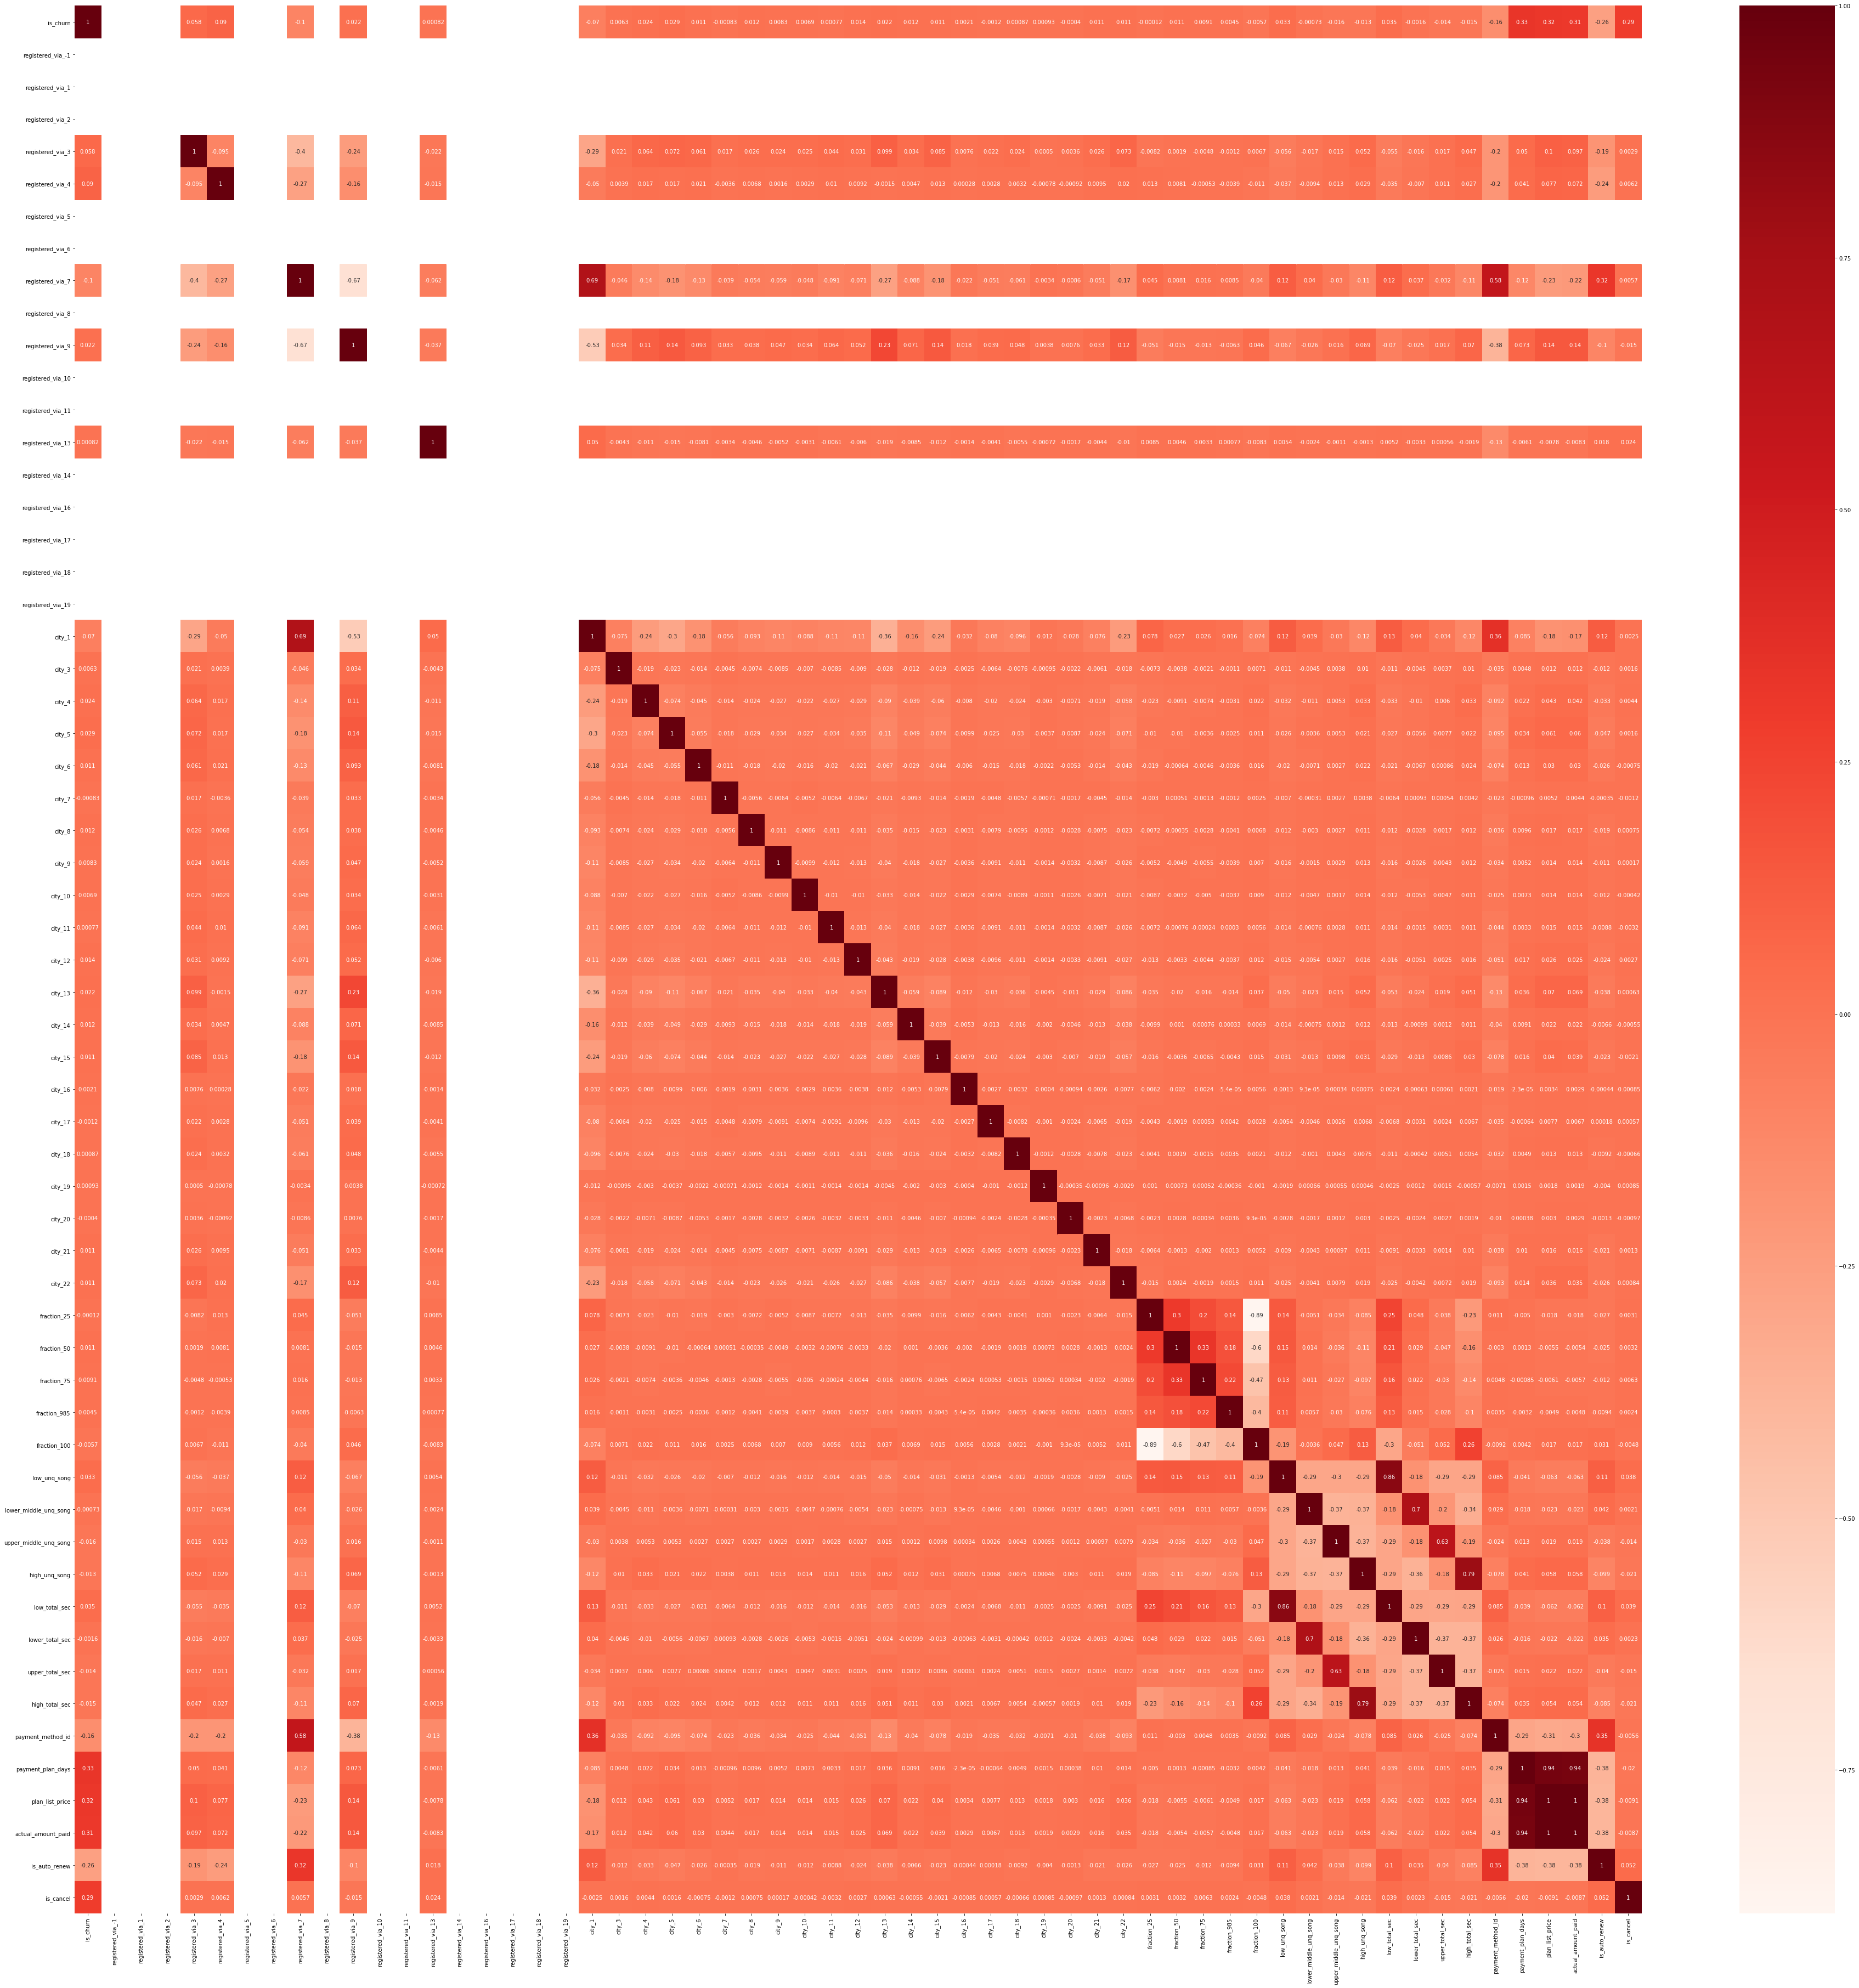

In [75]:
#Using Pearson Correlation
plt.figure(figsize=(64, 64))
cor = train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()